In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
%cd /content/drive/MyDrive/Colab Notebooks/Make School Winter 2021 Intensive
%ls 

/content/drive/MyDrive/Colab Notebooks/Make School Winter 2021 Intensive
 breastmnist.npz                octmnist.npz              pathmnist.npz
 chestmnist.npz                 organmnist_axial.npz      pneumoniamnist.npz
'Deep learning fashion.ipynb'   organmnist_coronal.npz    retinamnist.npz
 dermamnist.npz                 organmnist_sagittal.npz   Untitled0.ipynb


In [36]:
import numpy as np
import os

In [37]:
# make a list of the .npz files
files = [x for x in os.listdir() if x[-4::]=='.npz']
print('List of the MedMNIST data set files:\n',files)

# make a list of the MedMNIST data sets
data_sets = [x[:-4] for x in os.listdir() if x[-3::]=='npz']
print('\n\n','The names of the MedMNIST data sets are:\n',data_sets)

# extract the MedMNIST data sets into a dictionary named MedMNIST
MedMNIST = {file[:-4]:np.load(file) for file in files}

List of the MedMNIST data set files:
 ['breastmnist.npz', 'dermamnist.npz', 'octmnist.npz', 'chestmnist.npz', 'organmnist_axial.npz', 'organmnist_coronal.npz', 'organmnist_sagittal.npz', 'retinamnist.npz', 'pneumoniamnist.npz', 'pathmnist.npz']


 The names of the MedMNIST data sets are:
 ['breastmnist', 'dermamnist', 'octmnist', 'chestmnist', 'organmnist_axial', 'organmnist_coronal', 'organmnist_sagittal', 'retinamnist', 'pneumoniamnist', 'pathmnist']


In [38]:
print(list(MedMNIST.keys()))

['breastmnist', 'dermamnist', 'octmnist', 'chestmnist', 'organmnist_axial', 'organmnist_coronal', 'organmnist_sagittal', 'retinamnist', 'pneumoniamnist', 'pathmnist']


In [39]:
print('The MedMNIST dictionary entries are objects of type\n',type(MedMNIST['breastmnist']))
print('\nEach such object contains a dictionary whose keys are\n',MedMNIST['breastmnist'].files)

The MedMNIST dictionary entries are objects of type
 <class 'numpy.lib.npyio.NpzFile'>

Each such object contains a dictionary whose keys are
 ['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [40]:
train_labels = MedMNIST['breastmnist']['train_labels'].squeeze()
train_images = MedMNIST['breastmnist']['train_images']

val_labels = MedMNIST['breastmnist']['val_labels'].squeeze()
val_images = MedMNIST['breastmnist']['val_images']

test_labels = MedMNIST['breastmnist']['test_labels'].squeeze()
test_images = MedMNIST['breastmnist']['test_images']

In [45]:
print(train_images.shape)
print(train_labels.shape)

(546, 28, 28)
(546,)


In [42]:
print(val_images.shape)
print(val_labels.shape)

(78, 28, 28)
(78,)


In [43]:
print(test_images.shape)
print(test_labels.shape)

(156, 28, 28)
(156,)


In [61]:
train_images_original = train_images



In [44]:
train_images = train_images[:,:,:]



In [46]:
train_images.shape

(546, 28, 28)

In [47]:
train_images = train_images_original.mean(axis=-1)

In [48]:
train_images.shape

(546, 28)

In [50]:
R_images = train_images_original[:,:,0]
G_images = train_images_original[:,:,1]
B_images = train_images_original[:,:,2]

In [52]:
train_images = np.concatenate((R_images,G_images, B_images), axis = -1)

In [53]:
train_images.shape

(546, 84)

In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [83]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15',
               '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']

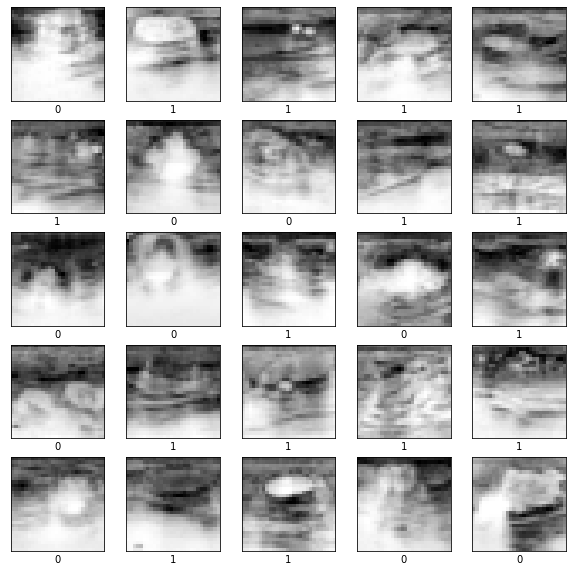

In [84]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)

])

In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [73]:
model.fit(test_images, test_labels, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 4ms/step - loss: 4.6318 - accuracy: 0.7821
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 3.8337 - accuracy: 0.7821
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 6.3697 - accuracy: 0.7051
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 6.4008 - accuracy: 0.8397
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 6.2365 - accuracy: 0.7244
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 4.1436 - accuracy: 0.8077
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 3.5456 - accuracy: 0.7949
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 3.6197 - accuracy: 0.8397
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 10.4490 - accuracy: 0.7051
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 5.6302 - accuracy: 0.7564


In [74]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

5/5 - 0s - loss: 7.2935 - accuracy: 0.8269

Test accuracy: 0.8269230723381042


In [78]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
img = test_images[1]
img = (np.expand_dims(img,0))

predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.7479164e-10 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


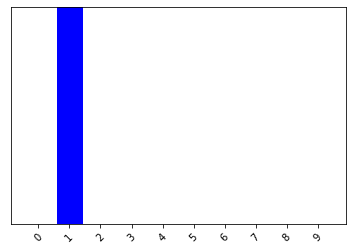

In [85]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)